In [1]:
import time
import mujoco
import mujoco.viewer
import mediapy as media
import matplotlib.pyplot as plt
import numpy as np
import transforms3d.quaternions as quaternions
import copy

In [2]:
xml = """
<mujoco>
  <asset>
    <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="512" />
    <texture name="plane" type="2d" builtin="checker" rgb1=".2 .3 .4" rgb2=".1 0.15 0.2" width="512" height="512" mark="cross" markrgb=".8 .8 .8" />
    <material name="plane" reflectance="0.3" texture="plane" texrepeat="1 1" texuniform="true" />
  </asset>


  <option>
    <!--flag contact="disable"/-->
    <!--flag gravity="disable"/-->
    <!--flag contact="disable" gravity="disable"/-->
  </option>

  <!--option  gravity="0 0 1"/-->


  <worldbody>
    <light directional="true" diffuse=".2 .2 .2" specular="0 0 0" pos="0 1 5" dir="0 -1 -1" castshadow="false"/>
    <light directional="false" diffuse=".8 .8 .8" specular="0.3 0.3 0.3" pos="0 -1 4" dir="0 0 -1" />
    <light directional="true" diffuse="0 0 0" specular=".7 .7 .7" pos="0 3 3" dir="0 -3 -3" />
    <geom name="floor" pos="0 0 0" group="1" size="0 0 .1" type="plane" material="plane" condim="3" />
    <camera name="fixed" pos="0.113 -4.286 5.167" xyaxes="1.000 0.003 0.000 -0.002 0.678 0.735"/>



    <body name="head" pos="0 0 1.5" euler="0 0 0">
        <joint name="freehead" type="free"/>
        <geom name="red_box" type="box" size="1 1 .2" rgba="1 0 0 1"/> !--add mass here if neeeded --

        <body name="rod11" pos="-1 -1 .3"> !-- change atatchment point to box -- 
              <joint name="ball11" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod11" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod12" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide1" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod12" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor1" pos="0 0 .3">
                    <joint name="ball12" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor1" type="box" size=".1 .1 .1" rgba="0 0 1 1"/>
                </body>
              </body>
        </body>

        <body name="rod21" pos="1 1 .3"> !-- change atatchment point to box --
              <joint name="ball21" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod21" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod22" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide2" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod22" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor2" pos="0 0 .3">
                    <joint name="ball22" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor2" type="box" size=".1 .1 .1" rgba="0 1 1 1"/>
                </body>
              </body>
        </body>

        <body name="rod31" pos="-1 0 .3"> !-- change atatchment point to box -- 
              <joint name="ball31" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod31" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod32" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide3" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod32" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor3" pos="0 0 .3">
                    <joint name="ball32" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor3" type="box" size=".1 .1 .1" rgba="0 0 1 1"/>
                </body>
              </body>
        </body>

        <body name="rod41" pos="1 0 .3"> !-- change atatchment point to box --
              <joint name="ball41" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod41" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod42" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide4" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod42" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor4" pos="0 0 .3">
                    <joint name="ball42" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor4" type="box" size=".1 .1 .1" rgba="0 1 1 1"/>
                </body>
              </body>
        </body>

        <body name="rod51" pos="-1 1 .3"> !-- change atatchment point to box -- 
              <joint name="ball51" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod51" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod52" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide5" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod52" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor5" pos="0 0 .3">
                    <joint name="ball52" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor5" type="box" size=".1 .1 .1" rgba="0 0 1 1"/>
                </body>
              </body>
        </body>

        <body name="rod61" pos="1 -1 .3"> !-- change atatchment point to box --
              <joint name="ball61" type="ball" axis="1 0 0" pos="0 0 -.2"/>
              <geom name="rod61" type="capsule" size=".05 .2 .2" rgba="1 0 1 0.5"/>

              <body name="rod62" pos="0 0 .2" quat="1 0 0 0">
                <joint name="slide6" type="slide" axis="0 0 1" pos="0 0 0" limited="true" range="-.5 .5" damping="10000"/>
                <geom name="rod62" type="capsule" size=".05 .2 .2" rgba="1 1 0 0.5"/>

                <body name="anchor6" pos="0 0 .3">
                    <joint name="ball62" type="ball" axis="1 0 0" pos="0 0 -.1"/>
                    <geom name="anchor6" type="box" size=".1 .1 .1" rgba="0 1 1 1"/>
                </body>
              </body>
        </body>


    </body>
  </worldbody>

  <equality>
    !--change relpos to change the position of weld points  repective to the world--
    !-- torquescale="100" -- 

    <weld name = "anchor1" body1="anchor1" relpose="1 1 -2.3 1 0 0 0" torquescale="10000"/>
    <weld name = "anchor3" body1="anchor3" relpose="1 0 -2.3 1 0 0 0" torquescale="10000"/>
    <weld name = "anchor5" body1="anchor5" relpose="1 -1 -2.3 1 0 0 0" torquescale="10000"/>

    <weld name = "anchor2" body1="anchor2" relpose="-1 -1 -2.3 1 0 0 0" torquescale="10000"/>
    <weld name = "anchor4" body1="anchor4" relpose="-1 0 -2.3 1 0 0 0" torquescale="10000"/>
    <weld name = "anchor6" body1="anchor6" relpose="-1 1 -2.3 1 0 0 0" torquescale="10000"/>
    <!--
    -->


    <!--
    <weld name = "anchor1" body1="anchor1"  torquescale="10000"/>
    <weld name = "anchor3" body1="anchor3"  torquescale="10000"/>
    <weld name = "anchor5" body1="anchor5"  torquescale="10000"/>

    <weld name = "anchor2" body1="anchor2"  torquescale="10000"/>
    <weld name = "anchor4" body1="anchor4"  torquescale="10000"/>
    <weld name = "anchor6" body1="anchor6"  torquescale="10000"/>
    -->
  </equality>

  <actuator>
    <position name="s1" joint="slide1" kp="10000"/>
    <position name="s3" joint="slide3" kp="10000"/>
    <position name="s5" joint="slide5" kp="10000"/>
    
    <position name="s2" joint="slide2" kp="10000"/>
    <position name="s4" joint="slide4" kp="10000"/>
    <position name="s6" joint="slide6" kp="10000"/>
  </actuator>

  <sensor>
    <framepos name="box_pos" objtype="geom" objname="red_box"/>
    <framequat name="box_rot" objtype="geom" objname="red_box"/>
  </sensor>

</mujoco>
"""



model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
mujoco.mj_kinematics(model,data)
#mujoco.viewer.launch(model)

In [3]:
#t = np.array([ 1.00000000e+00,  9.72047097e-17,  1.05294227e-16, -6.15606476e-21])
#np.degrees(quaternions.quat2euler(t))
#quaternions.quat2axangle(t)
#print(t)

In [4]:
import transforms3d.euler as euler
print(data.geom("red_box"))
data.geom("red_box").xmat = euler.euler2mat(100,0,0).reshape(-1)
print(data.geom("red_box"))
#

<_MjDataGeomViews
  id: 1
  name: 'red_box'
  xmat: array([1., 0., 0., 0., 1., 0., 0., 0., 1.])
  xpos: array([0. , 0. , 1.5])
>
<_MjDataGeomViews
  id: 1
  name: 'red_box'
  xmat: array([ 1.        , -0.        ,  0.        ,  0.        ,  0.86231887,
        0.50636564, -0.        , -0.50636564,  0.86231887])
  xpos: array([0. , 0. , 1.5])
>


In [5]:
# setup
n_seconds = 6
framerate = 30  # Hz
n_frames = int(n_seconds * framerate)
frames = []
renderer = mujoco.Renderer(model, 240, 320)

positions = []
times = []
rot_quat = []

# set initial state
#mujoco.mj_resetData(model, data)
#data.joint('root').qvel = 10
#data.body("head").xquat = [0.707,0,0,0.707]
#data.geom("red_box").xmat = euler.euler2mat(100,0,0).reshape(-1)
#data.geom("red_box").xmat = euler.euler2mat(100,0,0).reshape(-1)


# simulate and record frames
frame = 0
sim_time = 0
render_time = 0
n_steps = 0

start = time.time() #initl frame
for i in range(n_frames):
  #log information
  #positions.append(data.geom("red_box").xpos)
  #print(data.sensor("box_pos").data,data.geom("red_box").xpos) #sensor and xpos is the same
  #print(data.sensor("box_rot"))


  while data.time * framerate < i:
    tic = time.time()
    mujoco.mj_step(model, data)
    sim_time += time.time() - tic
    n_steps += 1

    #logging
    print(data.sensor("box_pos").data)
    positions.append(data.sensor("box_pos").data)
    rot_quat.append(data.sensor("box_rot").data)
    times.append(time.time()-start)
    
  tic = time.time()

  renderer.update_scene(data, "fixed")
  frame = renderer.render()
  render_time += time.time() - tic
  frames.append(frame)

# print timing and play video
step_time = 1e6*sim_time/n_steps
step_fps = n_steps/sim_time
print(f'simulation: {step_time:5.3g} μs/step  ({step_fps:5.0f}Hz)')
frame_time = 1e6*render_time/n_frames
frame_fps = n_frames/render_time
print(f'rendering: {frame_time:5.3g} μs/frame ({frame_fps:5.0f}Hz)')
print('\n')

# show video
#media.show_video(frames, fps=framerate)

[0.  0.  1.5]
[1.56564257e-22 1.71333713e-21 1.49996168e+00]
[4.92643919e-22 5.68396411e-22 1.49988602e+00]
[9.10177380e-22 1.22802125e-21 1.49977404e+00]
[1.25722112e-22 1.73888230e-21 1.49962677e+00]
[-3.29240803e-21  2.78863724e-21  1.49944533e+00]
[-6.34172129e-21  2.90457893e-21  1.49923089e+00]
[-1.38884761e-20  5.65436042e-21  1.49898469e+00]
[-2.83436005e-20  1.17730228e-20  1.49870810e+00]
[-4.47693929e-20  2.19622673e-20  1.49840259e+00]
[-6.82291631e-20  3.87211884e-20  1.49806964e+00]
[-9.33484061e-20  5.53014137e-20  1.49771077e+00]
[-1.18371433e-19  7.57904827e-20  1.49732746e+00]
[-1.43337817e-19  1.00480586e-19  1.49692118e+00]
[-1.68662349e-19  1.26702483e-19  1.49649338e+00]
[-1.92983321e-19  1.51302286e-19  1.49604550e+00]
[-2.16040653e-19  1.79058094e-19  1.49557894e+00]
[-2.44636153e-19  2.13173959e-19  1.49509507e+00]
[-2.59453501e-19  2.39066957e-19  1.49459522e+00]
[-2.67241237e-19  2.60418697e-19  1.49408070e+00]
[-2.73749903e-19  2.85526001e-19  1.49355276e+00

In [6]:
# Simulate and display video.
#frames = []
#duration = 10 #seconds
#mujoco.mj_resetData(model, data)  # Reset state and time.
#while data.time < duration:
#  mujoco.mj_step(model, data)
#  if len(frames) < data.time * framerate:
#    renderer.update_scene(data)
#    pixels = renderer.render()
#    frames.append(pixels)
#media.show_video(frames, fps=framerate)

In [7]:
for i in range(5):
  print(rot_quat[i])

[ 1.00000000e+00  4.23630427e-17  6.15251521e-18 -1.16601224e-17]
[ 1.00000000e+00  4.23630427e-17  6.15251521e-18 -1.16601224e-17]
[ 1.00000000e+00  4.23630427e-17  6.15251521e-18 -1.16601224e-17]
[ 1.00000000e+00  4.23630427e-17  6.15251521e-18 -1.16601224e-17]
[ 1.00000000e+00  4.23630427e-17  6.15251521e-18 -1.16601224e-17]


In [8]:
#convert data
xpos = [pos[0] for pos in positions]
ypos = [pos[1] for pos in positions]
zpos = [pos[2] for pos in positions]

#rotation
rot_euler = [np.degrees(quaternions.quat2axangle(rq)[0]) for rq in rot_quat]
xrot = [rot[0] for rot in rot_euler]
yrot = [rot[1] for rot in rot_euler]
zrot = [rot[2] for rot in rot_euler]

print("amount of timesteps", len(times), "same as xpos", len(xpos))
print(xpos)
print(xpos[::-1])

amount of timesteps 2984 same as xpos 2984
[-8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-18, -8.907157672859996e-

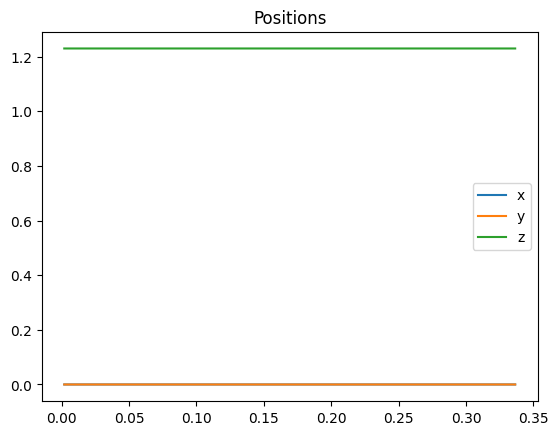

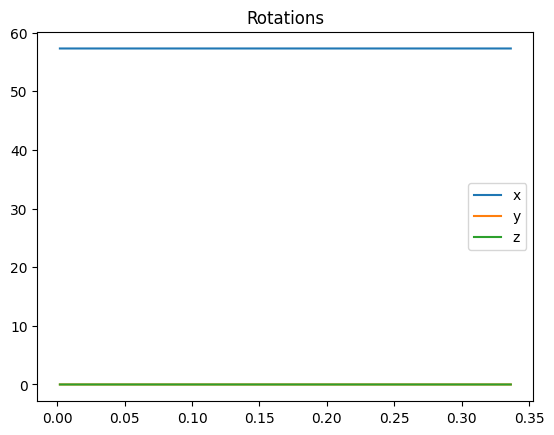

In [9]:
plt.title("Positions")
plt.plot(times,xpos,label="x")
plt.plot(times,ypos,label="y")
plt.plot(times,zpos,label="z")
plt.legend()
plt.show()

plt.title("Rotations")
plt.plot(times,xrot,label="x")
plt.plot(times,yrot,label="y")
plt.plot(times,zrot,label="z")
plt.legend()
plt.show()


In [10]:
def plotPos(positions,times):
  xpos = [pos[0] for pos in positions]
  ypos = [pos[1] for pos in positions]
  zpos = [pos[2] for pos in positions]

  plt.title("Positions")
  plt.plot(times,xpos,label="x")
  plt.plot(times,ypos,label="y")
  plt.plot(times,zpos,label="z")
  plt.legend()
  plt.show()

def plotRots(rots,times):
  rot_euler = [np.degrees(quaternions.quat2axangle(rq)[0]) for rq in rots]
  xrot = [rot[0] for rot in rot_euler]
  yrot = [rot[1] for rot in rot_euler]
  zrot = [rot[2] for rot in rot_euler]

  plt.title("Rotations")
  plt.plot(times,xrot,label="x")
  plt.plot(times,yrot,label="y")
  plt.plot(times,zrot,label="z")
  plt.legend()
  plt.show()

def plotActs(acts,times):
  as1 = [a[0] for a in acts]
  as2 = [a[1] for a in acts]
  as3 = [a[2] for a in acts]
  as4 = [a[3] for a in acts]
  as5 = [a[4] for a in acts]
  as6 = [a[5] for a in acts]

  plt.title("Actuation values")
  plt.plot(times,as1,label="s1")
  plt.plot(times,as2,label="s2")
  plt.plot(times,as3,label="s3")
  plt.plot(times,as4,label="s4")
  plt.plot(times,as5,label="s5")
  plt.plot(times,as6,label="s6")
  plt.legend()
  plt.show()


In [11]:
0/0

ZeroDivisionError: division by zero

[0.  0.  1.5]
[-3.64246080e-24  9.53972882e-23  1.49996168e+00]
[5.90856440e-23 7.18783273e-22 1.49988602e+00]
[2.77865262e-22 1.73985711e-21 1.49977404e+00]
[5.41927332e-22 2.83649315e-21 1.49962677e+00]
[2.26529843e-22 4.62963069e-21 1.49944533e+00]
[-2.83626098e-22  6.60835378e-21  1.49923089e+00]
[-1.63450977e-21  1.07131331e-20  1.49898469e+00]
[-2.47097844e-21  1.25296837e-20  1.49870810e+00]
[-2.49936211e-21  1.60761327e-20  1.49840259e+00]
[4.08709178e-22 1.68662075e-20 1.49806964e+00]
[6.34536617e-21 1.78278923e-20 1.49771077e+00]
[1.22743656e-20 1.98026210e-20 1.49732746e+00]
[1.67875432e-20 2.45525053e-20 1.49692118e+00]
[1.90139504e-20 2.82896146e-20 1.49649338e+00]
[2.13053500e-20 3.16559227e-20 1.49604550e+00]
[1.98029640e-20 3.77343406e-20 1.49557894e+00]
[2.08598086e-20 4.49642595e-20 1.49509507e+00]
[1.99215890e-20 4.96159967e-20 1.49459522e+00]
[1.58697646e-20 5.77225374e-20 1.49408070e+00]
[1.79995743e-20 6.41919461e-20 1.49355276e+00]
[1.56572477e-20 7.34507394e-20 

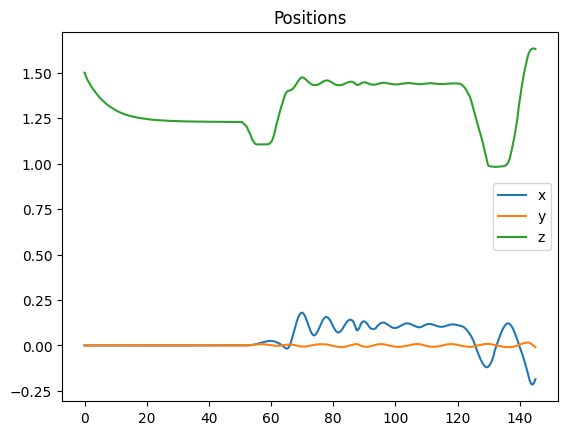

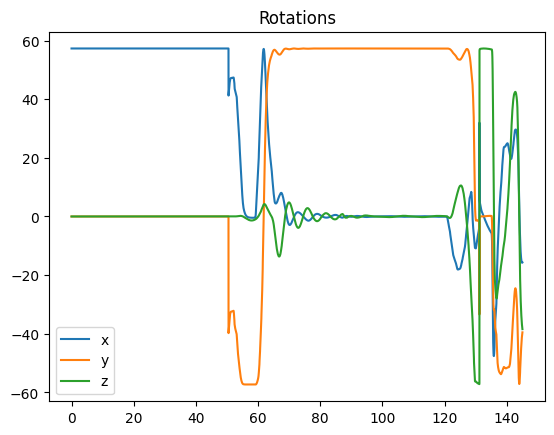

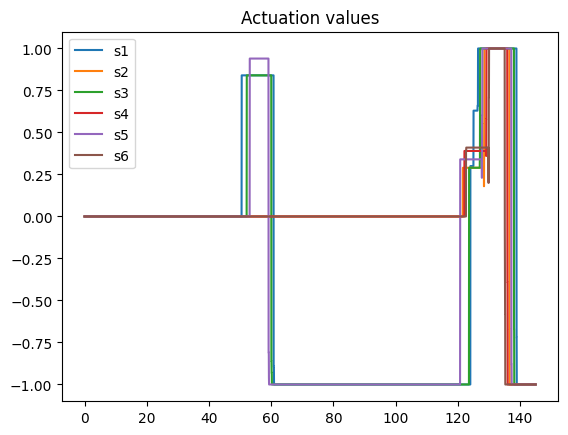

In [ ]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

#data logging
poss = []
rots = []
times = []
acts = []


with mujoco.viewer.launch_passive(model, data) as viewer:
  # Close the viewer automatically after 30 wall-seconds.
  start = time.time()
  while viewer.is_running() and time.time() - start < 3600:
    step_start = time.time()

    # mj_step can be replaced with code that also evaluates
    # a policy and applies a control signal before stepping the physics.
    mujoco.mj_step(model, data)

    # Example modification of a viewer option: toggle contact points every two seconds.
    with viewer.lock():
      viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_CONTACTPOINT] = int(data.time % 2)

    #print/log to track stuff
    poss.append(copy.deepcopy(data.sensor("box_pos").data))
    rots.append(copy.deepcopy(data.sensor("box_rot").data))
    times.append(time.time()-start)
    #print(model.actuator("s1").actnum)
    #print(data.actuator("s1").ctrl)
    print(data.sensor("box_pos").data)
    acts.append(copy.deepcopy([data.actuator("s1").ctrl,data.actuator("s2").ctrl,data.actuator("s3").ctrl,data.actuator("s4").ctrl,data.actuator("s5").ctrl,data.actuator("s6").ctrl]))

    
    # Pick up changes to the physics state, apply perturbations, update options from GUI.
    viewer.sync()

    # Rudimentary time keeping, will drift relative to wall clock.
    time_until_next_step = model.opt.timestep - (time.time() - step_start)
    #print(time_until_next_step,time.time()-start)
    if time_until_next_step > 0:
      time.sleep(time_until_next_step)

print("Time passed:", times[-1])

print("Amount of measurements:", len(times))
plotPos(poss,times)
plotRots(rots,times)
plotActs(acts,times)

In [ ]:
print(times)
xp = [p[0] for p in positions]
yp = [p[1] for p in positions]
zp = [p[2] for p in positions]
print(zp[-1])

[0.0, 0.003415346145629883, 0.018036842346191406, 0.020504474639892578, 0.03350687026977539, 0.048561811447143555, 0.06436920166015625, 0.06659555435180664, 0.07911109924316406, 0.09426712989807129, 0.11065840721130371, 0.12574219703674316, 0.14140629768371582, 0.15699076652526855, 0.1731095314025879, 0.1893012523651123, 0.20584559440612793, 0.20842266082763672, 0.21227121353149414, 0.21375107765197754, 0.22210454940795898, 0.22310614585876465, 0.2368335723876953, 0.2524559497833252, 0.2677876949310303, 0.28291821479797363, 0.30011701583862305, 0.3146815299987793, 0.3301100730895996, 0.34583330154418945, 0.360736608505249, 0.3765451908111572, 0.39246487617492676, 0.40776658058166504, 0.42489004135131836, 0.4270298480987549, 0.43910908699035645, 0.4549102783203125, 0.4724917411804199, 0.47449374198913574, 0.4866623878479004, 0.5020086765289307, 0.5175595283508301, 0.532778263092041, 0.5481102466583252, 0.5646605491638184, 0.5661768913269043, 0.5790348052978516, 0.594700813293457, 0.6100

In [ ]:
print(rots[0])
temp = rots[0][1:] + [rots[0][0]]
print(rots[0])
print(temp)
rot_euler = np.degrees(quaternions.quat2axangle(temp)[0])
print(rot_euler)

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 1. 1.]
[40.51423423 40.51423423]


In [ ]:
a = rots[0][1:]
b = [rots[0][0]]
c = np.concatenate((a,b))
d = np.array([1,0,0,0])
print(c)
e = quaternions.quat2axangle(d)[0]
print(e)
print(rot_euler)
print(rots[0])


[0. 0. 0. 1.]
[1. 0. 0.]
[40.51423423 40.51423423]
[1. 0. 0. 0.]


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

def quaternion_to_euler(quaternion):
    # Create a rotation object from the quaternion
    r = Rotation.from_quat(quaternion)
    
    # Convert the rotation to Euler angles
    euler_angles = r.as_euler('xyz', degrees=True)
    
    return euler_angles

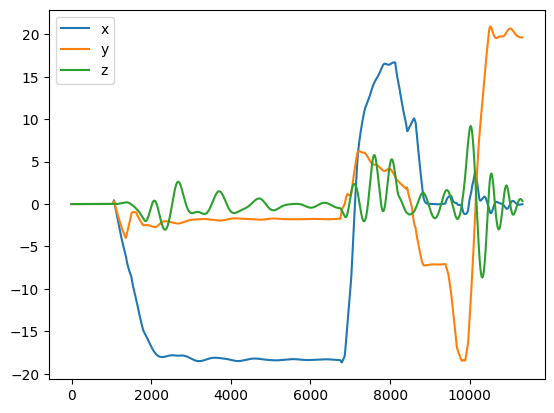

In [ ]:
rots_reordered = [np.concatenate((rot[1:],np.array([rot[0]]))) for rot in rots]
euler_angles = [quaternion_to_euler(rot) for rot in rots_reordered]
x,y,z = get_xyz(euler_angles)

plt.figure()
plt.plot(x, label = "x")
plt.plot(y, label = "y")
plt.plot(z, label = "z")
plt.legend()
plt.show()